In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics
from src.config import get_config_from_stem

# Define path for the test dataset
data_stem="dialog-re-llama-35cls-clsTskOnl-instrB"
test_file_path = f"/home/murilo/RelNetCare/data/processed/{data_stem}/{data_stem}-test.json"

# get config and evaluator
config = get_config_from_stem(data_stem)
evaluator = RelationExtractorEvaluator(config=config)

# Evaluate performance
df = evaluator.assess_performance_on_test_dataset(test_file_path, cap_size=None, return_details=True)
df.sort_values(['f1s', 'raw_inference'], ascending=[False, False])


output_dir= /home/murilo/RelNetCare/data/processed/dialog-re-llama-35cls-clsTskOnl-instrl



Script successfully executed!
Avg P: 0.0% | Avg R: 0.0% | Avg F1: 0.0% | Errors: 29/1862 (2%)
# INFERENCE REPORT
/home/murilo/RelNetCare/data/processed/dialog-re-llama-35cls-clsTskOnl/dialog-re-llama-35cls-clsTskOnl-test_20230904_161152.xlsx



,id,prompt,dialogue,true_labels,raw_inference,predicted_labels,correct_labels,wrong_labels,f1s,precision,recall,error_message
858,identity_161_018,\nClassify the relation between the source and...,"\n[\n ""Speaker 1: Ross? Let’s go."",\n ""Speaker...",[visited_place],Vegas is a city in the U.S. state of Nevada.,[Vegas is a city in the U.S. state of Nevada.],[],[Vegas is a city in the U.S. state of Nevada.],0,0.0,0.0,
1243,identity_227_018,\nClassify the relation between the source and...,"\n[\n ""Speaker 1: Hi, is Rachel here? I’m her ...",[unanswerable],"Hi, is Rachel here? I’m her sister.","[Hi, is Rachel here? I’m her sister.]",[],"[Hi, is Rachel here? I’m her sister.]",0,0.0,0.0,
1245,identity_227_020,\nClassify the relation between the source and...,"\n[\n ""Speaker 1: Hi, is Rachel here? I’m her ...",[unanswerable],"Hi, is Rachel here? I’m her sister.","[Hi, is Rachel here? I’m her sister.]",[],"[Hi, is Rachel here? I’m her sister.]",0,0.0,0.0,
1241,identity_227_016,\nClassify the relation between the source and...,"\n[\n ""Speaker 1: Hi, is Rachel here? I’m her ...",[acquaintance],"Hi, Rachel!","[Hi, Rachel!]",[],"[Hi, Rachel!]",0,0.0,0.0,
1672,identity_316_000,\nClassify the relation between the source and...,"\n[\n ""Speaker 1: Hey."",\n ""Speaker 2: Hey! An...",[title],Hey there!,[Hey there!],[],[Hey there!],0,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
906,identity_169_001,\nClassify the relation between the source and...,None,[employees_or_members],None,[],None,None,None,NaN,NaN,"Invalid response object from API: '{""object"":""..."
907,identity_169_002,\nClassify the relation between the source and...,None,[employees_or_members],None,[],None,None,None,NaN,NaN,"Invalid response object from API: '{""object"":""..."
908,identity_169_003,\nClassify the relation between the source and...,None,[employees_or_members],None,[],None,None,None,NaN,NaN,"Invalid response object from API: '{""object"":""..."
909,identity_169_004,\nClassify the relation between the source and...,None,[employees_or_members],None,[],None,None,None,NaN,NaN,"Invalid response object from API: '{""object"":""..."


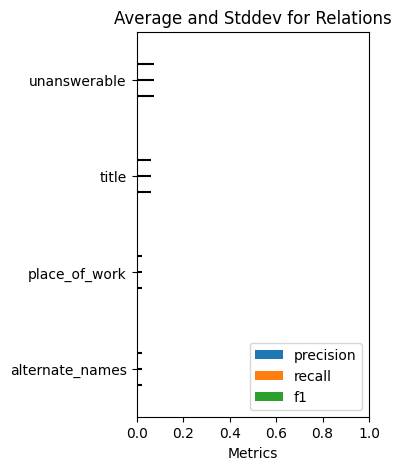

In [8]:

# Define your ontology
your_ontology = {
    # "Null-Relation", "other_family", "siblings",
    # "visited_place", "place_of_residence",
    # "spouse", "pet", "acquaintance", "children",
    # "visitors_of_place", "residents_of_place", "parents", 
    
    "title", "alternate_names", "place_of_work", "unanswerable"
    }

# Usage
my_metrics = RelationGranularMetrics(df, your_ontology)
result = my_metrics.process()
chart_df = my_metrics.to_dataframe()
my_metrics.plot_metrics(chart_df)


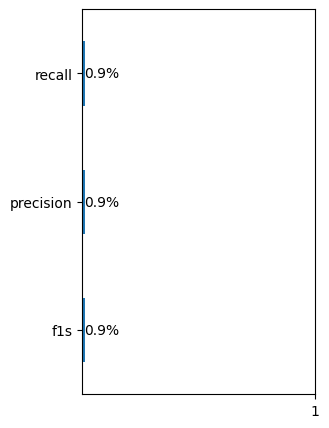

In [9]:
import matplotlib.pyplot as plt

# Your plotting code here
ax = df[['f1s', 'precision', 'recall']].mean().plot(kind='barh', alpha=1, figsize=(3, 5))

# Set x-axis tick labels
plt.xticks([1], ['1'])

# Adding data values on top of each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1%}', 
             va='center', ha='left')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

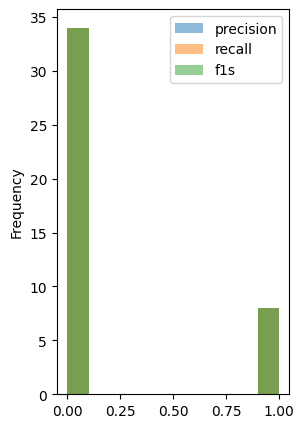

In [18]:
df[['precision', 'recall', 'f1s']].fillna(0).plot(kind='hist', alpha=0.5, figsize=(3, 5))


In [ ]:
print(config.preprompt)


Extract personal relevant entities, and their relations. Return only the jsonl format list. Extract entities and relations from the given dialogue input and generate a JSON list as output that is structured according to the entity and relation types from the ontology.

Ontology: 
- relations: {"place_of_residence", "siblings", "residents_of_place", "visited_place", "visitors_of_place", "other_family", "parents", "pet", "acquaintance", "children", "spouse"}
- types: {"ORG", "GPE", "PERSON", "DATE", "EVENT", “ANIMAL”}

Input:
[
"Speaker 1: Emma got a cat, Max.",
"Speaker 2: Nice! Who is Emma?",
"Speaker 1: She's my sister.",
]

Output:
[
{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "siblings", "object": "Emma", "object_type": "PERSON"},
{"subject": "Emma", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 1", "object_type": "PERSON"},
{"subject": "Emma", "subject_type": "PERSON", "relation": "pet", "object": "Max", "object_type": "ANIMAL"},
{"subject

In [9]:
dialogue = 'Speaker 1: Hi, you are my father.\nSpeaker 2: Yes, I am your father'
# dialogue = 'Speaker 1: I went to Maryland.\nSpeaker 2: Why?\nSpeaker 1: I work at Google there.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! What is his name?\nSpeaker 1: John.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! '
jsonl = evaluator.infer_from_model(dialogue, preprompt=config.preprompt)
print(dialogue)

try:
    print(jsonl.replace('},', '},\n'))
except Exception as e:
    print(f'Exception={e}')
    print(jsonl)

Speaker 1: Hi, you are my father.
Speaker 2: Yes, I am your father

Extract personal relevant entities, and their relations. Return only the jsonl format list. Extract entities and relations from the given dialogue input and generate a JSON list as output that is structured according to the entity and relation types from the ontology.

Ontology: 
- relations: {"place_of_residence", "siblings", "residents_of_place", "visited_place", "visitors_of_place", "other_family", "parents", "pet", "acquaintance", "children", "spouse"}
- types: {"ORG", "GPE", "PERSON", "DATE", "EVENT", “ANIMAL”}

Input:
[
"Speaker 1: Hi, you are my father.",
"Speaker 2: Yes, I am your father",
]

Output:
[
{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 2", "object_type": "PERSON"},

{"subject": "Speaker 2", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 1", "object_type": "PERSON"},

{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "